In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

In [3]:
sns.set(style="whitegrid")

LOAD DATASET

In [82]:
dataFrame = pd.read_csv('/home/makhoe_7/projects/DataAnalysis/YoutubeDataAnalysis/dataset/youtube_data.csv')

In [5]:
dataFrame.head()

,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments
0,--F7dc-_FSI,180,5777,5640,1920,1080,25.00,25.00,h264,News & Politics,https://www.youtube.com/watch?v=--F7dc-_FSI,«السودان ينتفض» أمام السفارة بالقاهرة,حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...,"في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...",4078,41,3
1,--cCAD-8Y_U,930,1195,1001,1280,720,30.00,30.00,h264,Gaming,https://www.youtube.com/watch?v=--cCAD-8Y_U,Pokemon Tower Defense Episodio 2,Espero que tenham gostado do video!,"Pokémon (Anime/Manga Franchise), Pokémon (Vide...",33,2,1
2,--g2gG8pQ0w,233,3028,2833,1280,720,23.98,23.98,h264,Comedy,https://www.youtube.com/watch?v=--g2gG8pQ0w,New Hip Hop - Kemo Treats - Pancakes,Download all our music for FREE just enter $0....,"breaking bad spoof, Recipes, Pancakes, canada,...",13227,135,17
3,-0DR7-voRCU,562,431,300,320,240,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0DR7-voRCU,Sister's Keeper Impression,A Review of the Shampoo Bar(Sunburst) and Dip ...,"natural hair, first impression, sister's keepe...",43,1,0
4,-0Fkp-2EzX0,300,3087,2929,1280,720,23.98,23.98,h264,Gaming,https://www.youtube.com/watch?v=-0Fkp-2EzX0,JBHAMMER777 (AKUMA) VS KtossPol Rank 1 (Vega)...,JBHAMMER777 is he strong enough to fight again...,"Tokido, momochi, (Ryu), AE, 11, at, Piyoppia, ...",222,2,0


In [13]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17589 entries, 0 to 17588
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          17589 non-null  object 
 1   duration          17589 non-null  int64  
 2   bitrate           17589 non-null  int64  
 3   bitrate(video)    17589 non-null  int64  
 4   height            17589 non-null  int64  
 5   width             17589 non-null  int64  
 6   frame rate        17589 non-null  float64
 7   frame rate(est.)  17589 non-null  float64
 8   codec             17589 non-null  object 
 9   category          17589 non-null  object 
 10  url               17589 non-null  object 
 11  title             17589 non-null  object 
 12  description       16477 non-null  object 
 13  hashtags          16013 non-null  object 
 14  views             17589 non-null  int64  
 15  likes             17589 non-null  int64  
 16  comments          17589 non-null  int64 

In [7]:
dataFrame.describe()

,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),views,likes,comments
count,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,1.758900e+04,17589.000000,17589.000000
mean,241.551936,1271.354369,1150.418443,766.781170,504.591961,26.467639,9.471172,6.894158e+04,208.862641,12.899312
std,493.026994,1375.359875,1351.800202,467.289304,262.727746,6.039748,13.253197,3.537491e+06,8477.504735,225.839378
min,1.000000,0.000000,0.000000,108.000000,88.000000,3.750000,0.000000,0.000000e+00,0.000000,0.000000
25%,51.000000,437.000000,326.000000,426.000000,320.000000,25.000000,0.000000,3.800000e+01,0.000000,0.000000
50%,135.000000,743.000000,632.000000,640.000000,480.000000,29.970000,0.000000,1.520000e+02,1.000000,0.000000
75%,268.000000,1293.000000,1184.000000,960.000000,720.000000,29.970000,25.000000,8.000000e+02,4.000000,1.000000
max,25845.000000,22421.000000,22229.000000,2592.000000,1944.000000,59.080000,30.000000,4.103849e+08,836981.000000,16634.000000


In [8]:
dataFrame.isnull().sum()

video_id               0
duration               0
bitrate                0
bitrate(video)         0
height                 0
width                  0
frame rate             0
frame rate(est.)       0
codec                  0
category               0
url                    0
title                  0
description         1112
hashtags            1576
views                  0
likes                  0
comments               0
dtype: int64

In [10]:
dataFrame.dtypes

video_id             object
duration              int64
bitrate               int64
bitrate(video)        int64
height                int64
width                 int64
frame rate          float64
frame rate(est.)    float64
codec                object
category             object
url                  object
title                object
description          object
hashtags             object
views                 int64
likes                 int64
comments              int64
dtype: object

In [11]:
dataFrame.duplicated().sum()

np.int64(0)

### YouTube analysis querying: 
- Do higher resolution videos lead to higher engagement ratios?

- Is there an optimal video duration for likes and comments?

- Do shorter or longer titles/descriptions correlate with better interaction?

- How does video category affect engagement ratios?

- Does positive sentiment in titles/descriptions increase views or likes?

- Are higher bitrate / frame rate videos more engaging?

- What is the relationship between views and engagement ratios (likes/view, comments/view)?

- Which combinations of features (duration + quality + category) maximize engagement?

- Do hashtags and keywords improve interaction?

In [50]:
## Engagement ratio
dataFrame['like_ratio'] = dataFrame['likes'] / dataFrame['views']
dataFrame['comment_ratio'] = dataFrame['comments'] / dataFrame['views']
dataFrame['engagement_score'] = dataFrame['like_ratio'] + dataFrame['comment_ratio']

## Resolution
dataFrame['pixels'] = dataFrame['height'] * dataFrame['width']


## Title and Description length
dataFrame['title_length'] = dataFrame['title'].astype(str).str.len()
dataFrame['description_length'] = dataFrame['description'].astype(str).str.len()


## Sentiment Analysis
dataFrame['title_sentiment'] = dataFrame['title'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
dataFrame['description_sentiment'] = dataFrame['description'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)


## Duration bins
bins = [0, 180, 600, np.inf]
labels = ['Short', 'Medium', 'Long']
dataFrame['duration_bin'] = pd.cut(dataFrame['duration'], bins=bins, labels=labels)
dataFrame['views_bin'] = pd.cut(dataFrame['views'], bins=bins, labels=labels)

Analysis and Visualization

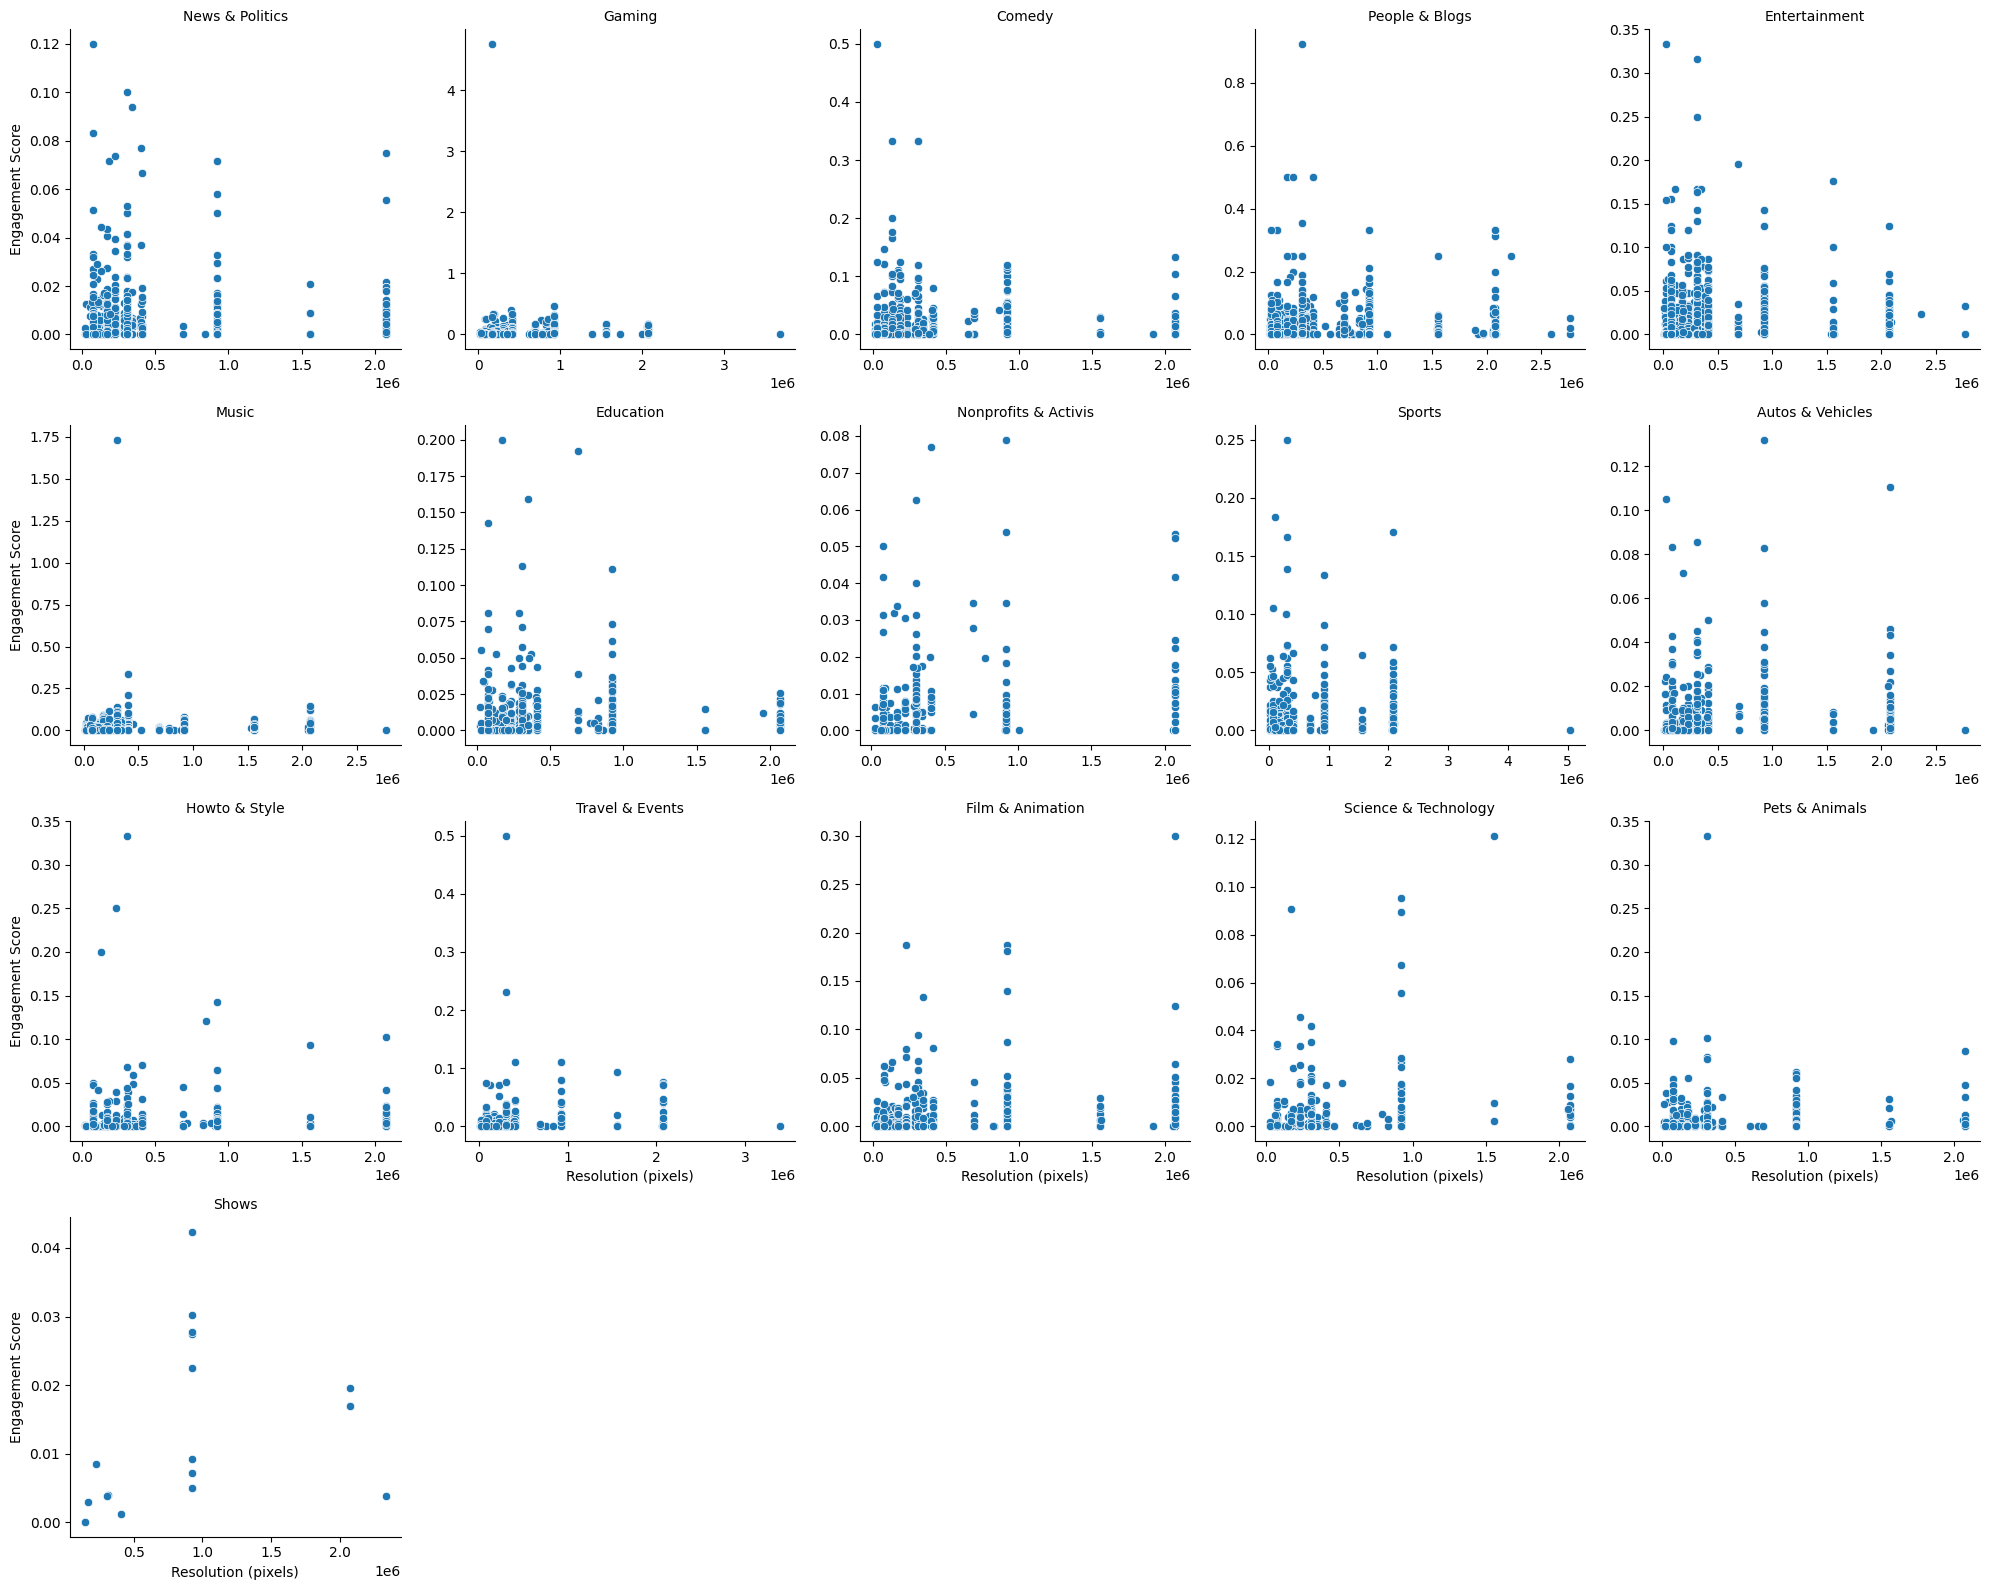

In [81]:
## Do higher resolution videos lead to higher engagement ratios?

g = sns.FacetGrid(dataFrame, col='category', col_wrap=5, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x='pixels', y='engagement_score')
g.set_axis_labels("Resolution (pixels)", "Engagement Score")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()




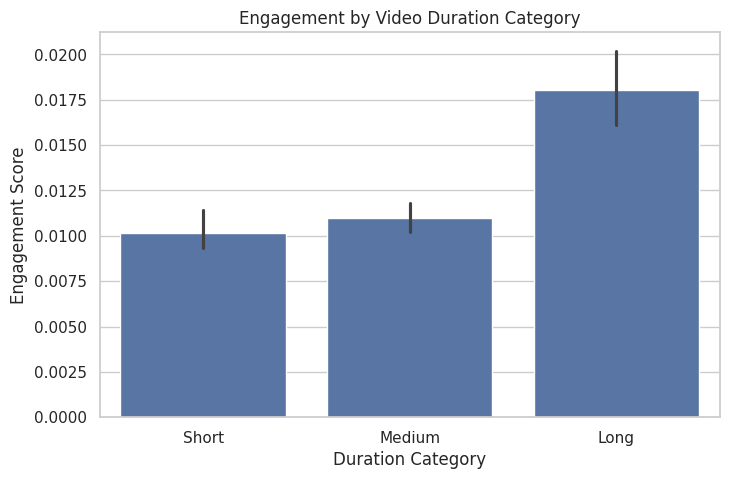

In [38]:
### Is there an optimal video duration for likes and comments?
plt.figure(figsize=(8,5))
sns.barplot(x='duration_bin', y='engagement_score', data=dataFrame)
plt.title("Engagement by Video Duration Category")
plt.xlabel("Duration Category")
plt.ylabel("Engagement Score")
plt.show()

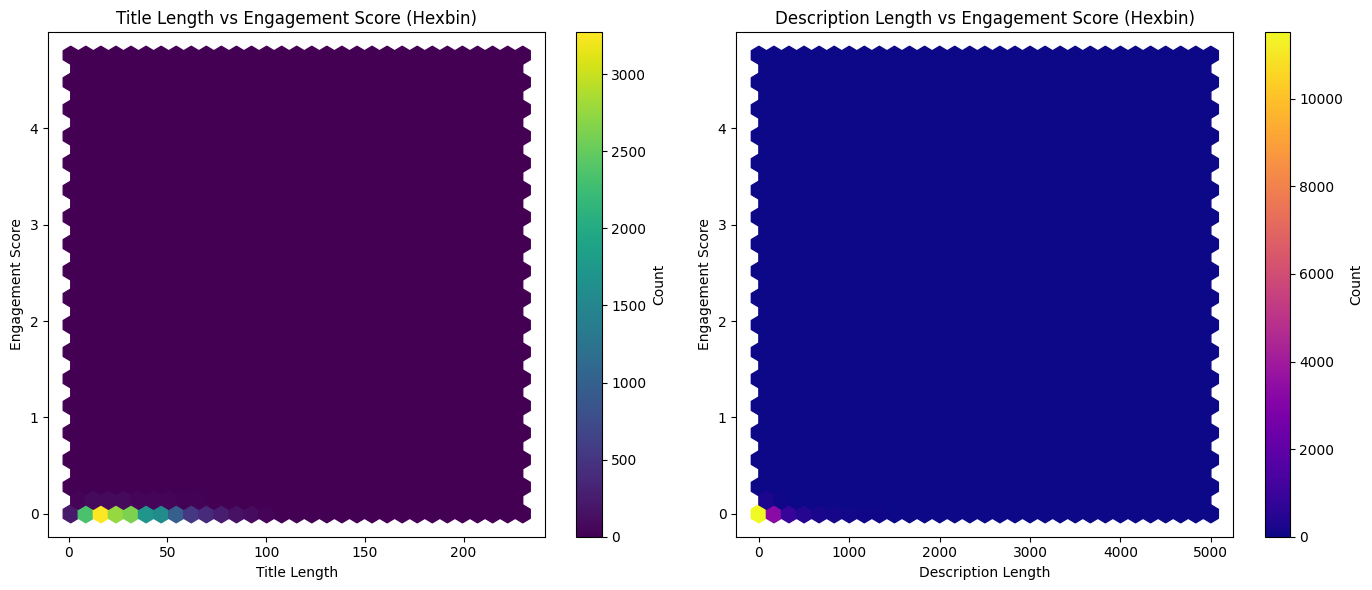

In [76]:
### Do shorter or longer titles/descriptions correlate with better interaction?

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hexbin(dataFrame['title_length'], dataFrame['engagement_score'], gridsize=30, cmap='viridis')
plt.colorbar(label='Count')
plt.xlabel("Title Length")
plt.ylabel("Engagement Score")
plt.title("Title Length vs Engagement Score (Hexbin)")

plt.subplot(1, 2, 2)
plt.hexbin(dataFrame['description_length'], dataFrame['engagement_score'], gridsize=30, cmap='plasma')
plt.colorbar(label='Count')
plt.xlabel("Description Length")
plt.ylabel("Engagement Score")
plt.title("Description Length vs Engagement Score (Hexbin)")
plt.tight_layout()
plt.show()






/tmp/ipykernel_160408/1775158749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='engagement_score', y='category', data=avg_engagement_sorted, palette='coolwarm')


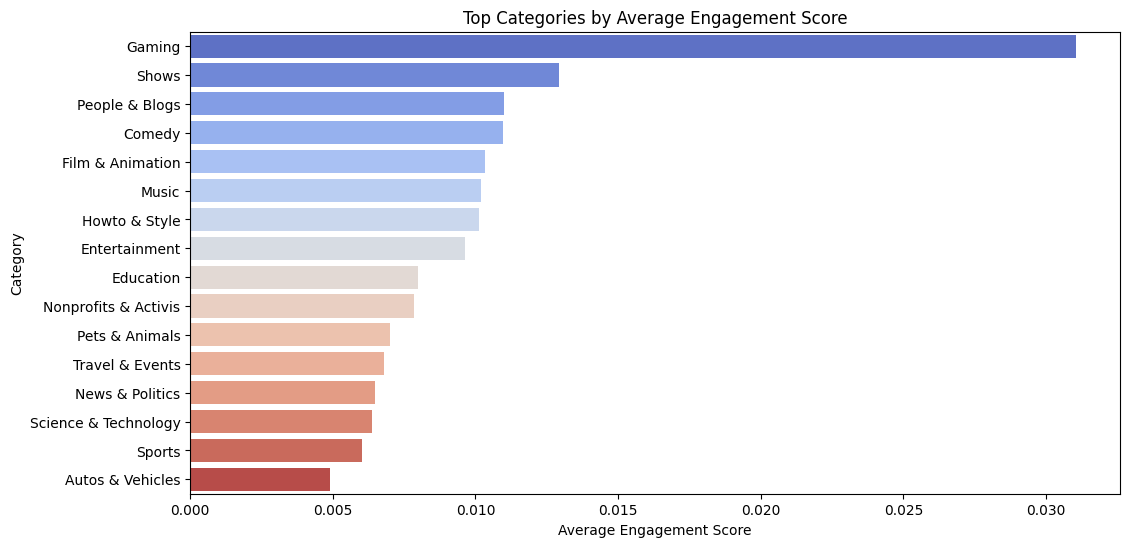

In [71]:
### How does video category affect engagement ratios?


avg_engagement_sorted = avg_engagement.sort_values(by='engagement_score', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='engagement_score', y='category', data=avg_engagement_sorted, palette='coolwarm')
plt.title("Top Categories by Average Engagement Score")
plt.xlabel("Average Engagement Score")
plt.ylabel("Category")
plt.show()





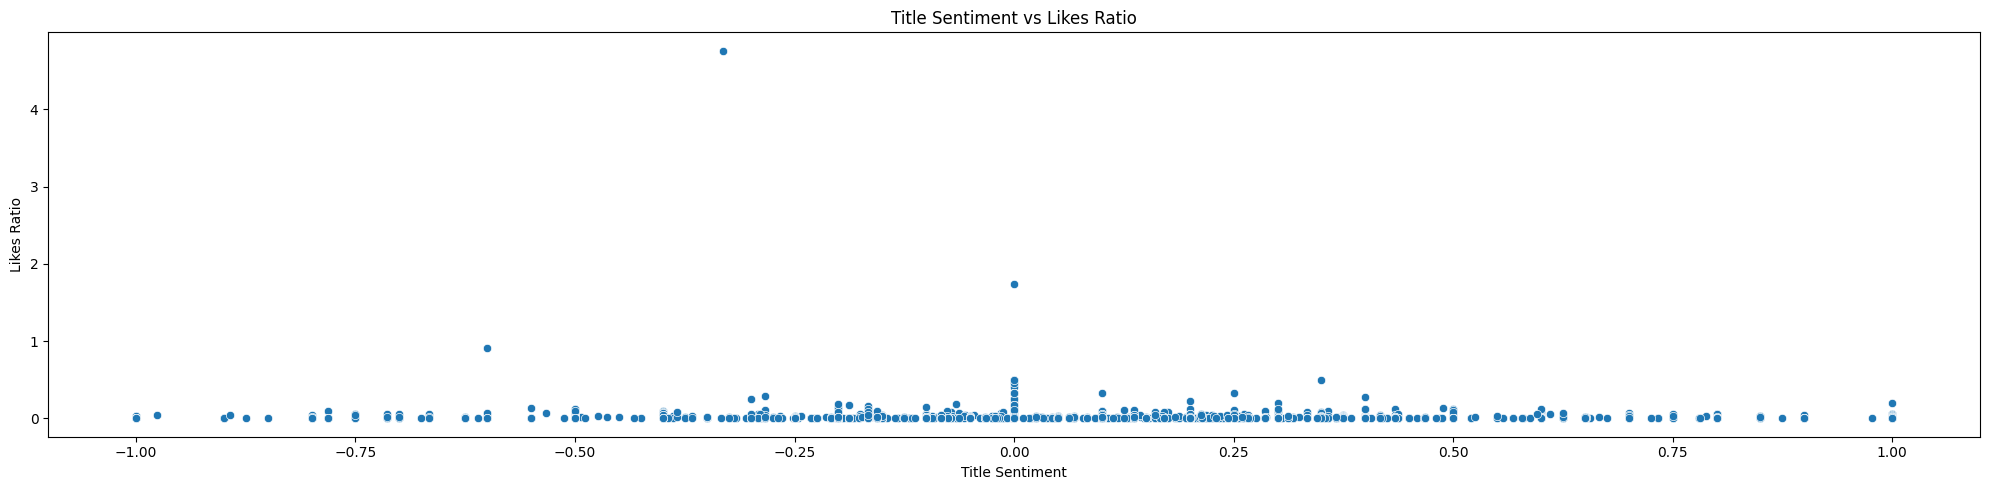

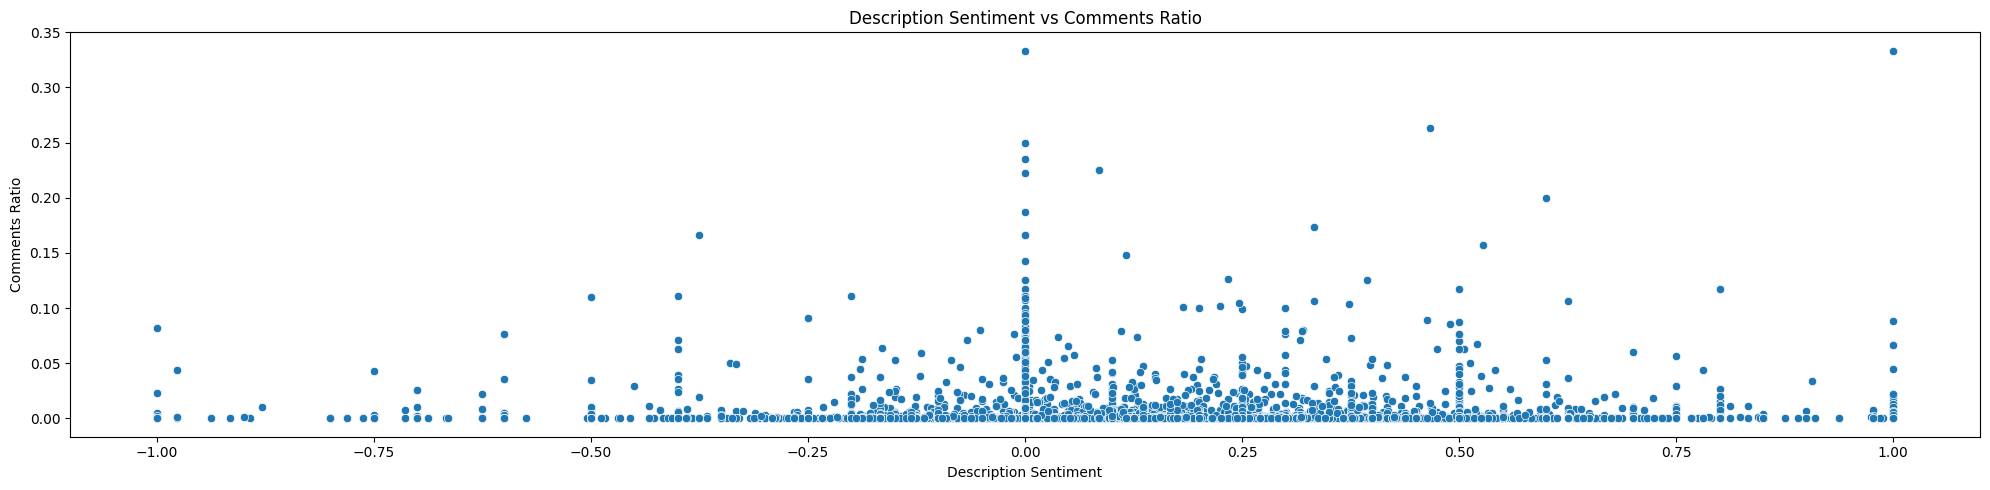

In [63]:
### Does positive sentiment in titles/descriptions increase views or likes?
plt.figure(figsize=(20,5))
sns.scatterplot(x='title_sentiment', y='like_ratio', data=dataFrame)
plt.title("Title Sentiment vs Likes Ratio")
plt.xlabel("Title Sentiment")
plt.ylabel("Likes Ratio")
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,5))
sns.scatterplot(x='description_sentiment', y='comment_ratio', data=dataFrame)
plt.title("Description Sentiment vs Comments Ratio")
plt.xlabel("Description Sentiment")
plt.ylabel("Comments Ratio")
plt.tight_layout()
plt.show()

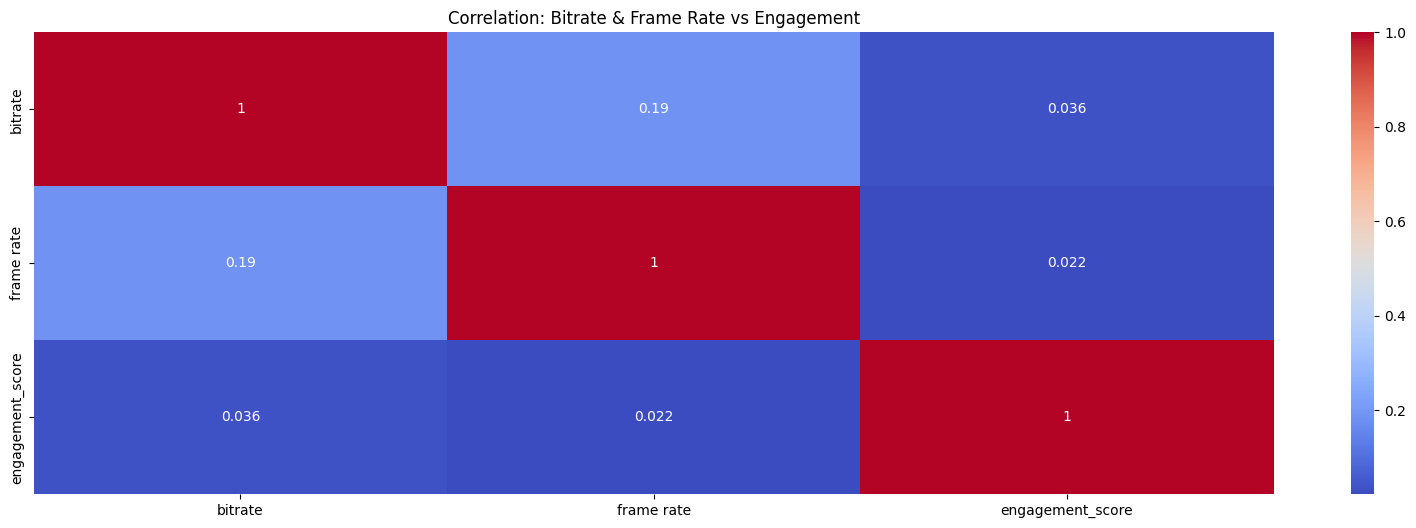

In [58]:
### Are higher bitrate / frame rate videos more engaging?

plt.figure(figsize=(20,6))
sns.heatmap(dataFrame[['bitrate','frame rate','engagement_score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation: Bitrate & Frame Rate vs Engagement")
plt.show()

/tmp/ipykernel_160408/604997345.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_engagement = dataFrame.groupby('views_bin')[['like_ratio','comment_ratio']].mean().reset_index()


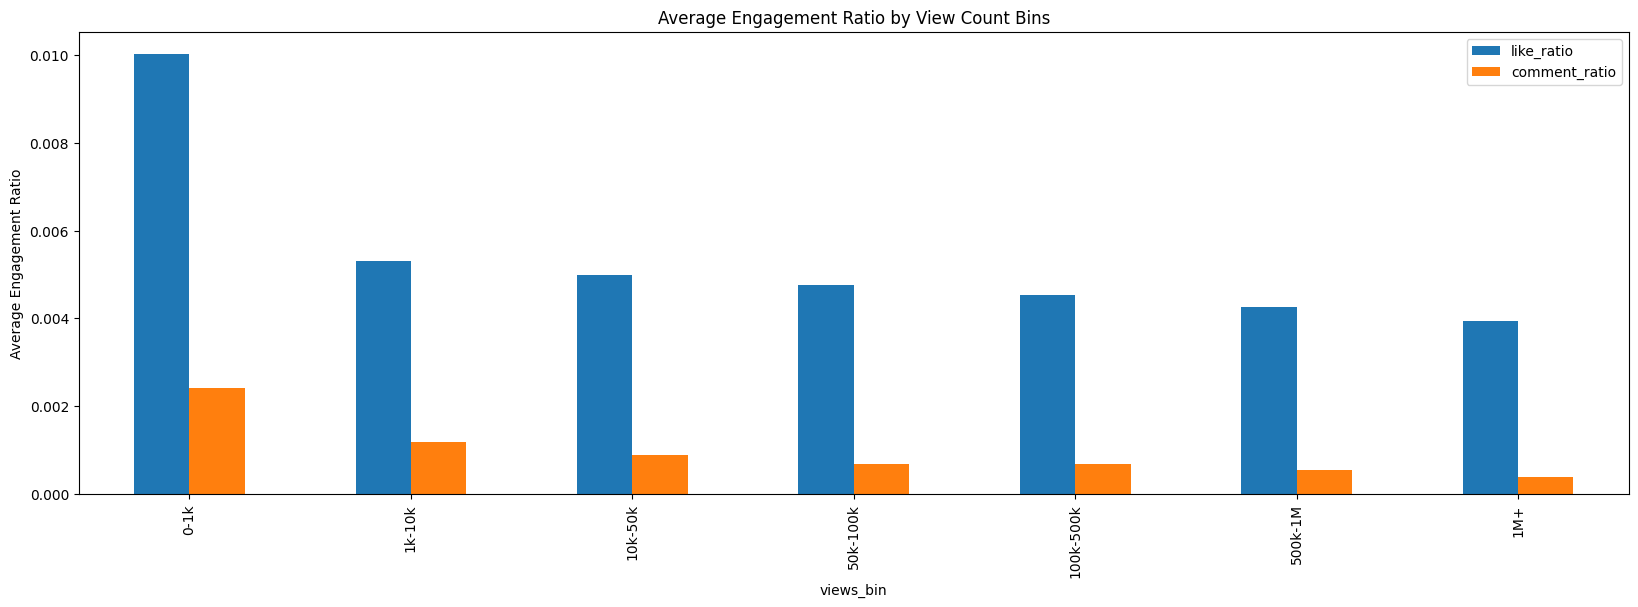

In [57]:
###  What is the relationship between views and engagement ratios (likes/view, comments/view)?

bins = [0, 1000, 10000, 50000, 100000, 500000, 1000000, dataFrame['views'].max()]
labels = ['0-1k','1k-10k','10k-50k','50k-100k','100k-500k','500k-1M','1M+']
avg_engagement = dataFrame.groupby('views_bin')[['like_ratio','comment_ratio']].mean().reset_index()

avg_engagement.plot(x='views_bin', y=['like_ratio','comment_ratio'], kind='bar', figsize=(20,6))
plt.ylabel("Average Engagement Ratio")
plt.title("Average Engagement Ratio by View Count Bins")
plt.show()







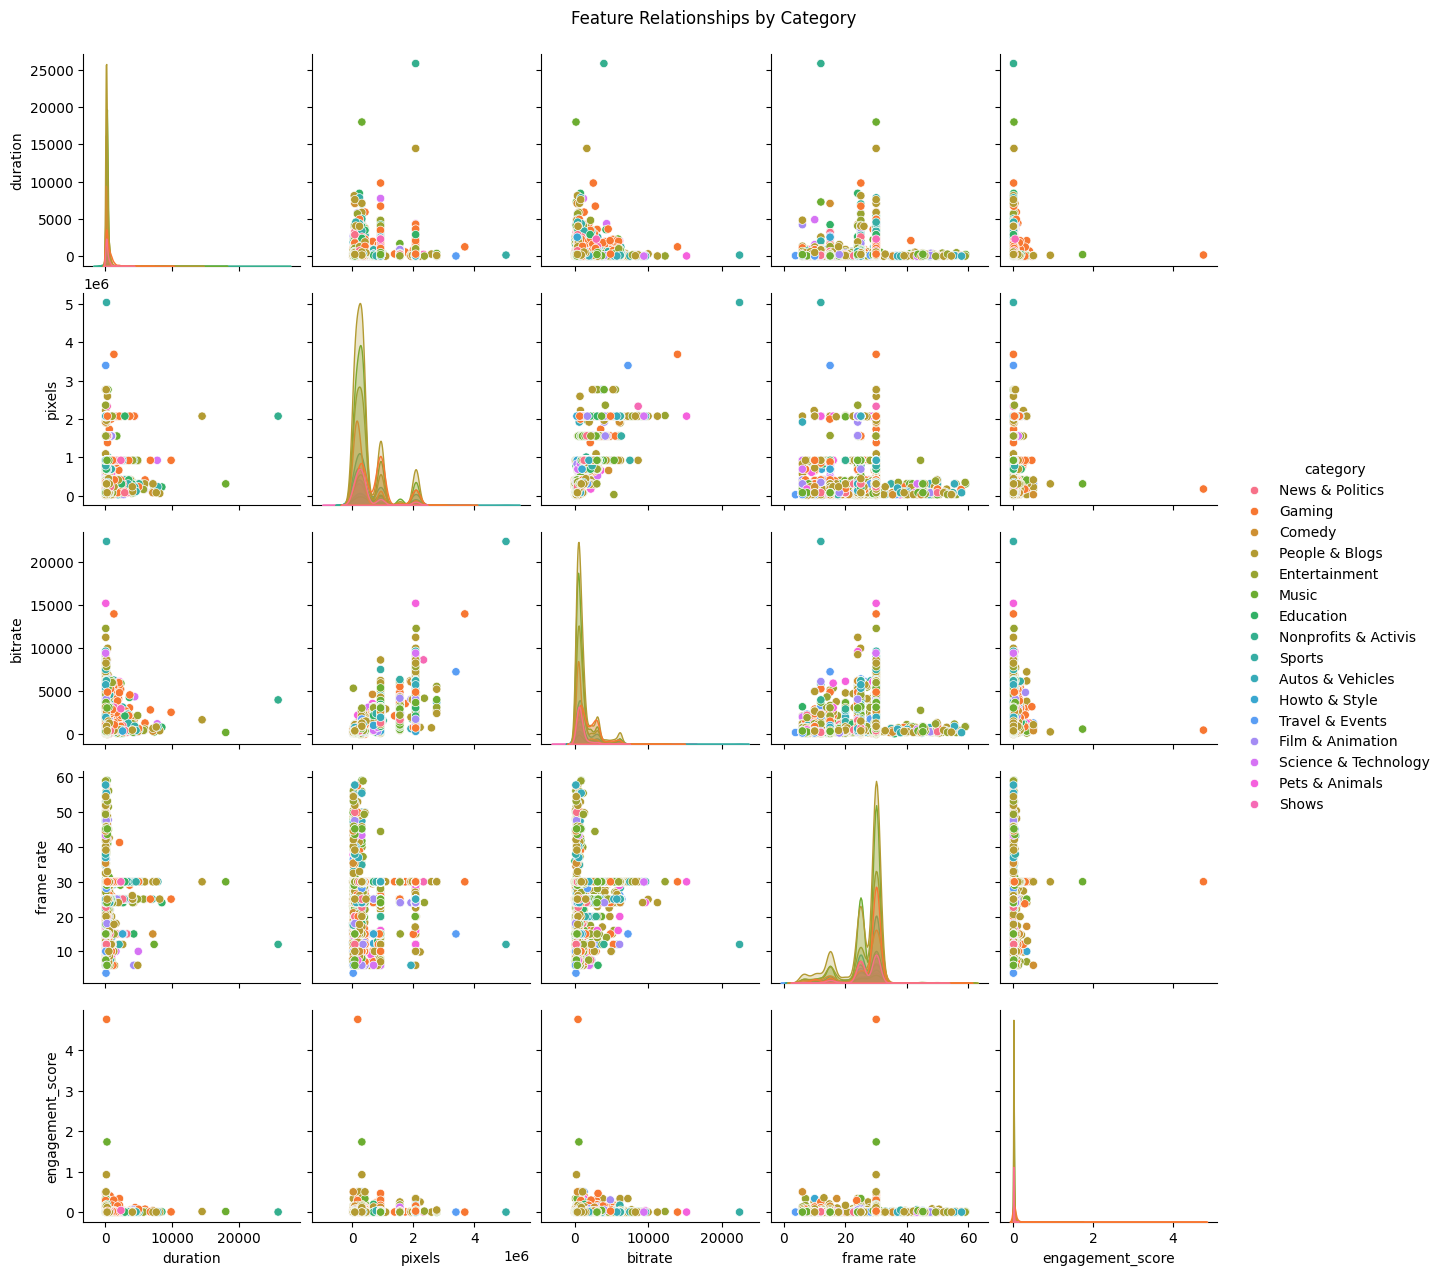

In [26]:
### Which combinations of features (duration + quality + category) maximize engagement?
sns.pairplot(dataFrame, vars=['duration', 'pixels', 'bitrate', 'frame rate', 'engagement_score'], hue='category')
plt.suptitle("Feature Relationships by Category", y=1.02)
plt.show()  

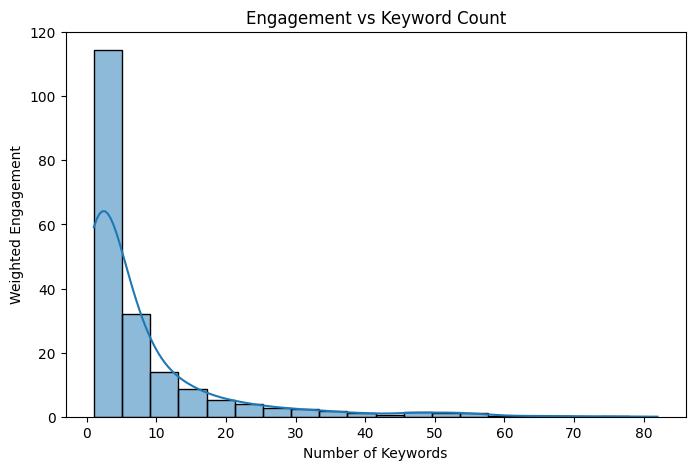

In [43]:
### Do hashtags and keywords improve interaction?

dataFrame['has_hashtags'] = dataFrame['hashtags'].astype(str).apply(lambda x: 1 if x != '[]' else 0)
dataFrame['keyword_count'] = dataFrame['hashtags'].astype(str).apply(lambda x: len(x.split(',')) if x != '[]' else 0)   
plt.figure(figsize=(8,5))
sns.histplot(data=dataFrame, x='keyword_count', weights='engagement_score', bins=20, kde=True)
plt.title("Engagement vs Keyword Count")
plt.xlabel("Number of Keywords")
plt.ylabel("Weighted Engagement")
plt.show()






